In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/accidents_2017.csv')
display(df)

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2017S003667,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Tuesday,April,25,8,Morning,1,0,1,3,2.201800,41.392004
10335,2017S001896,Sant Andreu,el Bon Pastor,PL MONTERREY ...,Wednesday,March,8,12,Morning,1,0,1,2,2.206013,41.443445
10336,2017S010718,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Thursday,December,28,8,Morning,1,0,1,2,2.205607,41.443894
10337,2017S006145,Sant Andreu,el Bon Pastor,Litoral (Besòs) ...,Friday,July,14,14,Afternoon,1,0,1,2,2.205118,41.444824


In [ ]:
df.dtypes

Id                    object
District Name         object
Neighborhood Name     object
Street                object
Weekday               object
Month                 object
Day                    int64
Hour                   int64
Part of the day       object
Mild injuries          int64
Serious injuries       int64
Victims                int64
Vehicles involved      int64
Longitude            float64
Latitude             float64
dtype: object

In [ ]:
df.nunique()

Id                   10335
District Name           11
Neighborhood Name       74
Street                4253
Weekday                  7
Month                   12
Day                     31
Hour                    24
Part of the day          3
Mild injuries           11
Serious injuries         4
Victims                 11
Vehicles involved       14
Longitude             5492
Latitude              5442
dtype: int64

In [ ]:
df.isnull().sum()

Id                   0
District Name        0
Neighborhood Name    0
Street               0
Weekday              0
Month                0
Day                  0
Hour                 0
Part of the day      0
Mild injuries        0
Serious injuries     0
Victims              0
Vehicles involved    0
Longitude            0
Latitude             0
dtype: int64

There are no missing entries, although there are 'unknown' values which as seen above are explicitly mentioned

###Q1. How does a typical accident look like?

In [ ]:
df.describe()

,Day,Hour,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
count,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000
mean,15.775994,13.811394,1.154174,0.023310,1.178644,1.920979,2.162832,41.399346
std,8.763455,5.316490,0.742294,0.163803,0.735145,0.714011,0.024176,0.021251
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.091855,41.323094
25%,8.000000,10.000000,1.000000,0.000000,1.000000,2.000000,2.144985,41.386288
50%,16.000000,14.000000,1.000000,0.000000,1.000000,2.000000,2.163399,41.396730
75%,23.000000,18.000000,1.000000,0.000000,1.000000,2.000000,2.180179,41.411038
max,31.000000,23.000000,10.000000,4.000000,10.000000,14.000000,2.222572,41.468244


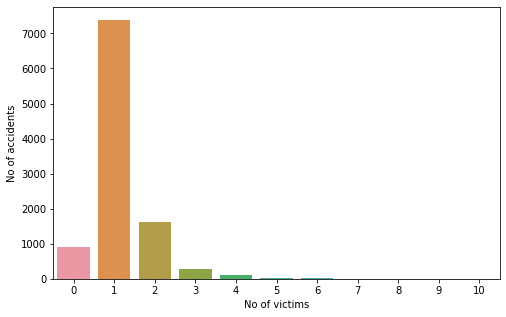

In [ ]:
plt.figure(figsize=(8,5))
sn.countplot(x = 'Victims', data = df) # Frequency Bar
plt.ylabel('No of accidents')
plt.xlabel('No of victims')
plt.show()

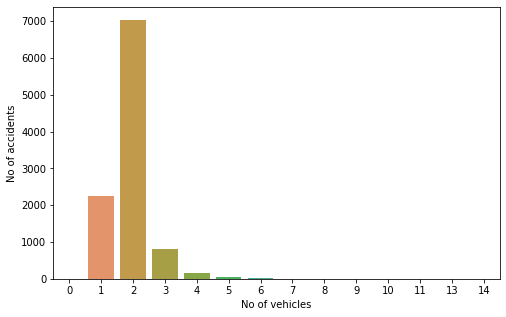

In [ ]:
plt.figure(figsize=(8,5))
sn.countplot(x = 'Vehicles involved', data = df) # Frequency Bar
plt.ylabel('No of accidents')
plt.xlabel('No of vehicles')
plt.show()

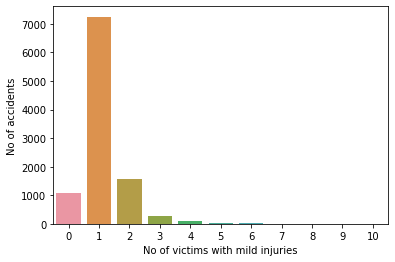

In [ ]:
plt.figure(figsize=(6,4))
sn.countplot(x = 'Mild injuries', data = df) # Frequency Bar
plt.ylabel('No of accidents')
plt.xlabel('No of victims with mild injuries')
plt.show()

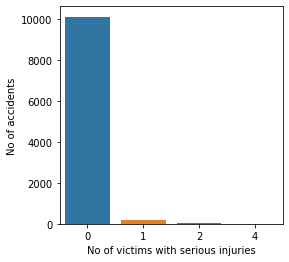

In [ ]:
plt.figure(figsize=(4,4))
sn.countplot(x = 'Serious injuries', data = df) # Frequency Bar
plt.ylabel('No of accidents')
plt.xlabel('No of victims with serious injuries')
plt.show()

A typical accident (by both mean and mode) involves 2 vehicles and a victim (mostly having mild injuries)

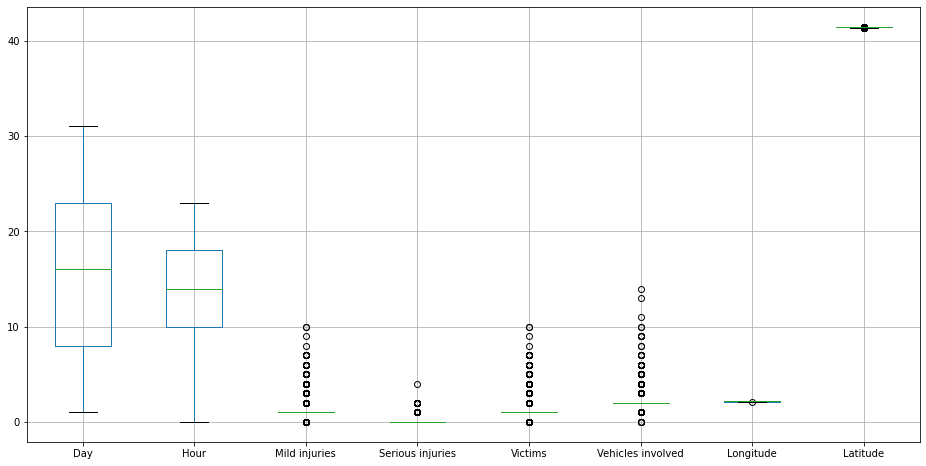

In [ ]:
plt.figure(figsize=(16,8))
df.boxplot()

Central 50 % of the accidents take place between 10th and 18th hour of the day and between 8th and 23rd day of the month

###Q2. How do the number of accidents vary with the time of day?

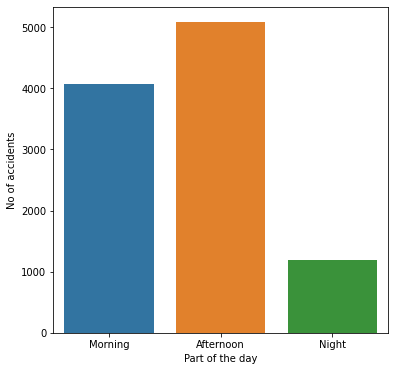

In [ ]:
plt.figure(figsize=(6,6))
sn.countplot(x = 'Part of the day', data = df) # Frequency Bar
plt.ylabel('No of accidents')
plt.xlabel('Part of the day') # Categorical
plt.show()

Most of the accidents have taken place in afternoon followed by morning. Few in night. (Aprrox A:M:N = 5:4:1)

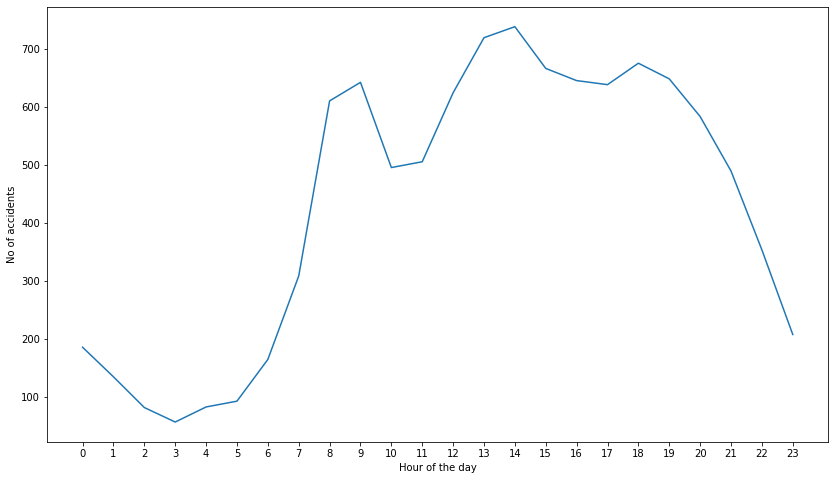

In [ ]:
plt.figure(figsize=(14,8))
x = [i for i in range(24)]
y = df['Hour'].value_counts()[x]
sn.lineplot(x,y) # Frequency Line
plt.ylabel('No of accidents')
plt.xlabel('Hour of the day') # Temporal
plt.xticks(x)
plt.show()

The number of accidents are high between the 8th and 19th hour of the day (8 AM to 8 PM, usually the working hours)<br/>
Peaks at 9 AM, 2 PM, 6 PM may suggest office going, lunch leave, office return timings when the traffic itself peaks

###Q3. How do the number of accidents vary with location?

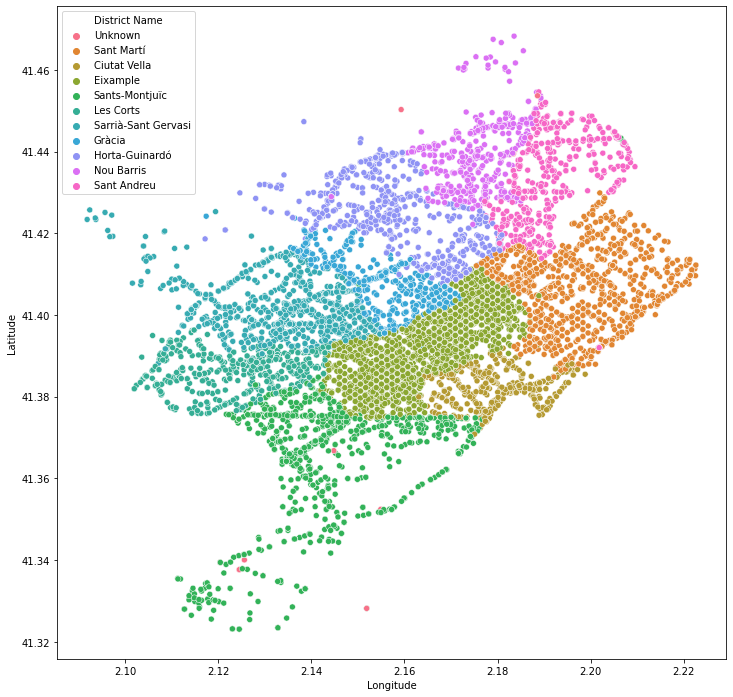

In [ ]:
# 2D Map of Accidents
plt.figure(figsize=(12,12))
sn.scatterplot(x = 'Longitude', y = 'Latitude', data = df, hue = 'District Name')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

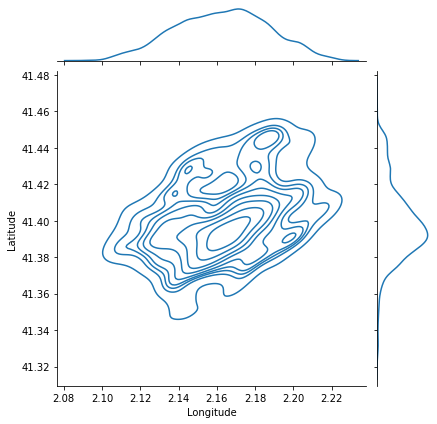

In [ ]:
sn.jointplot(x = 'Longitude', y = 'Latitude', data = df, kind = 'kde')

Joint Kernel Density Estimation Plot showing denser regions of accidents in 2D

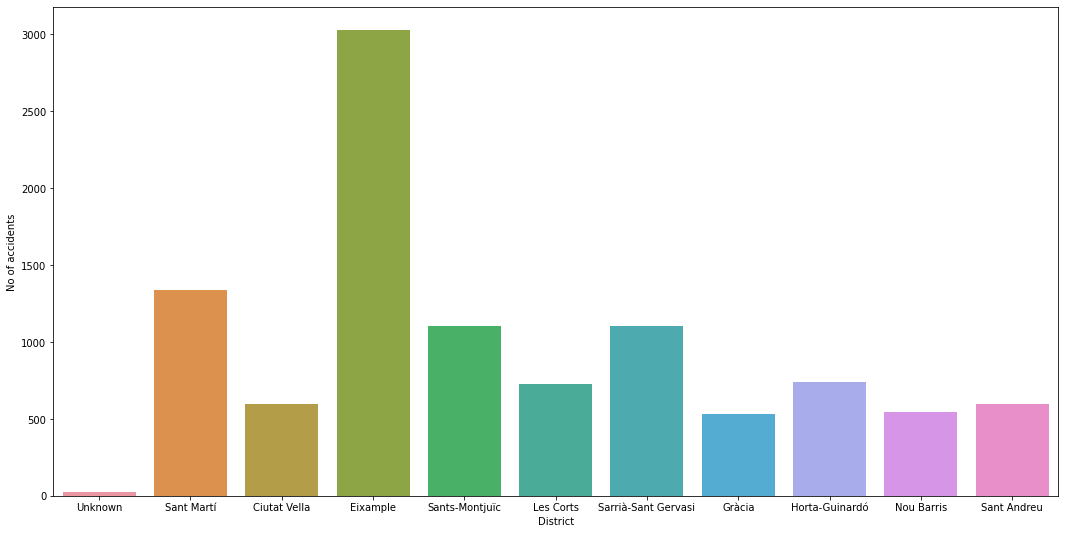

In [ ]:
plt.figure(figsize=(18,9))
sn.countplot(x = 'District Name', data = df)
plt.ylabel('No of accidents')
plt.xlabel('District')
plt.show()

Maximum number of accidents (~3000) have taken place in 'Eixample' district

5 neighbourhoods with most accidents

Text(0, 0.5, 'Number of accidents')

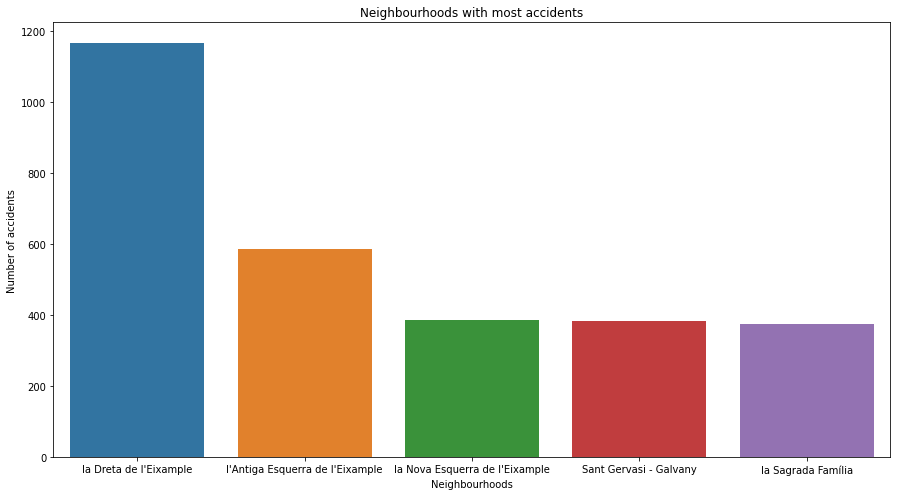

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
nbhs = df['Neighborhood Name'].value_counts()[:5]
ax=sn.barplot(x=nbhs.index,y=nbhs.values)
ax.set_title('Neighbourhoods with most accidents')
ax.set_xlabel('Neighbourhoods')
ax.set_ylabel('Number of accidents')

Top 5 streets prone to accidents

Text(0, 0.5, 'Number of accidents')

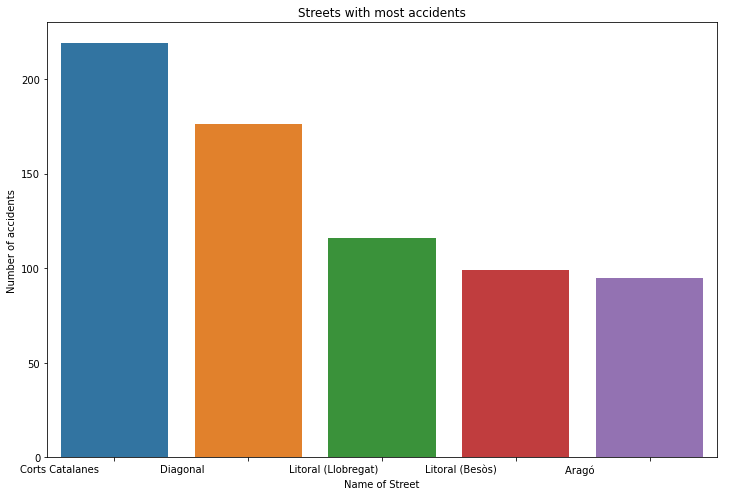

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
streets = df['Street'].value_counts()[:5]
ax=sn.barplot(x=streets.index,y=streets.values)
ax.set_title('Streets with most accidents')
ax.set_xlabel('Name of Street')
ax.set_ylabel('Number of accidents')

###Q4. How do the number of accidents vary with weekday, day of month, and month?

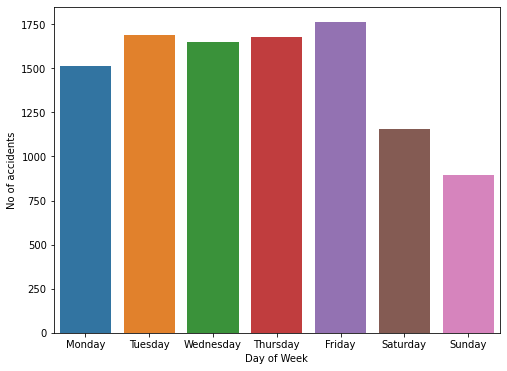

In [ ]:
plt.figure(figsize=(8,6))
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sn.countplot(x = 'Weekday', data = df, order = day_order) # Frequency Bar
plt.ylabel('No of accidents')
plt.xlabel('Day of Week') # Categorical
plt.show()

Clearly less number of accidents on weekend i.e. Saturday and Sunday compared to workdays

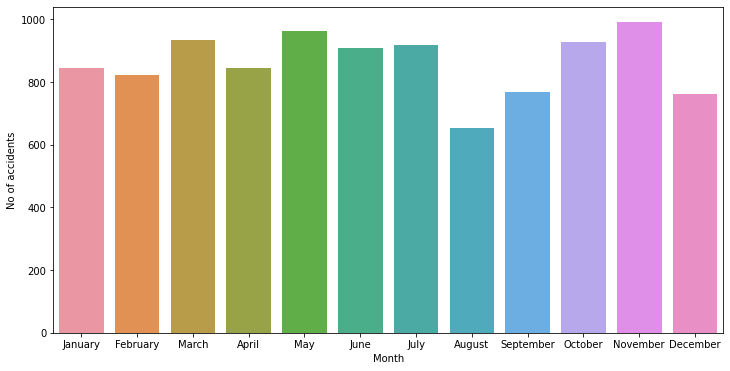

In [ ]:
plt.figure(figsize=(12,6))
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
sn.countplot(x = 'Month', data = df, order = month_order) # Frequency Bar
plt.ylabel('No of accidents')
plt.xlabel('Month') # Categorical
plt.show()

Highest number of accidents recorded in November and lowest in August

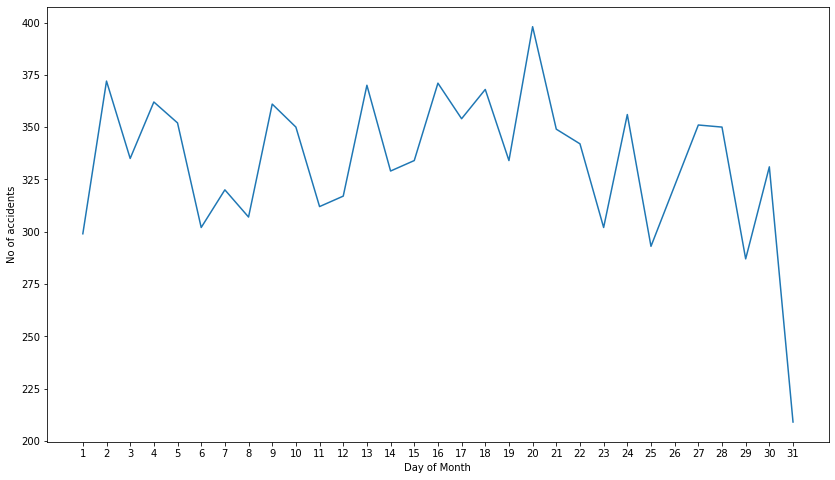

In [ ]:
plt.figure(figsize=(14,8))
x = [i for i in range(1,32)]
y = df['Day'].value_counts()[x]
sn.lineplot(x,y) # Frequency Line
plt.ylabel('No of accidents')
plt.xlabel('Day of Month') # Temporal
plt.xticks(x)
plt.show()

As expected, nothing much is revealed here, except least accidents recorded on 31st of month which is due to less months having 31 days

###Q5. Does the part of day have any special influence on other variables?

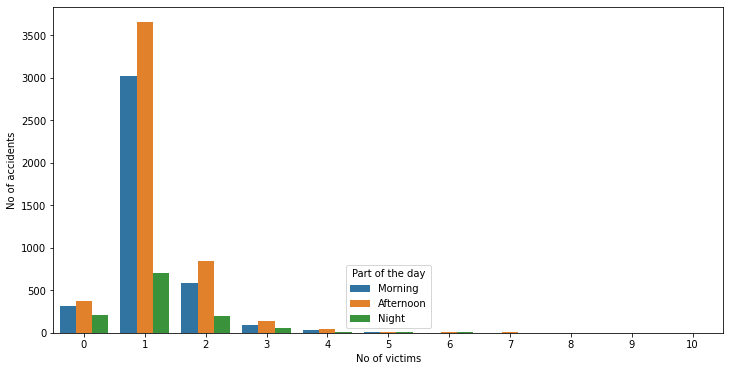

In [ ]:
plt.figure(figsize=(12,6))
sn.countplot(x = 'Victims', data = df, hue = 'Part of the day')
plt.ylabel('No of accidents')
plt.xlabel('No of victims')
plt.show()

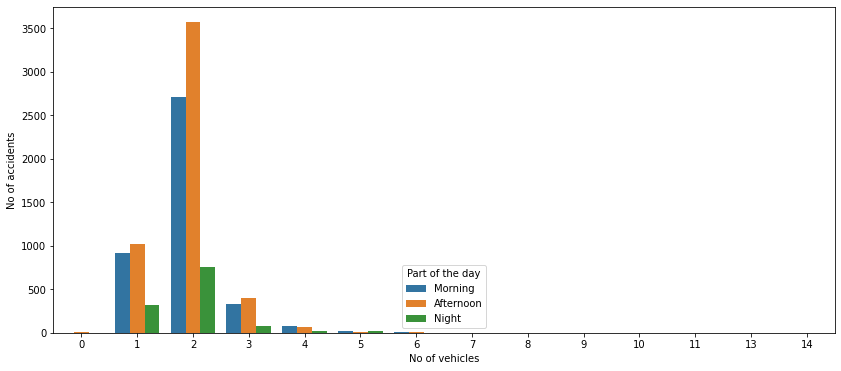

In [ ]:
plt.figure(figsize=(14,6))
sn.countplot(x = 'Vehicles involved', data = df, hue = 'Part of the day')
plt.ylabel('No of accidents')
plt.xlabel('No of vehicles')
plt.show()

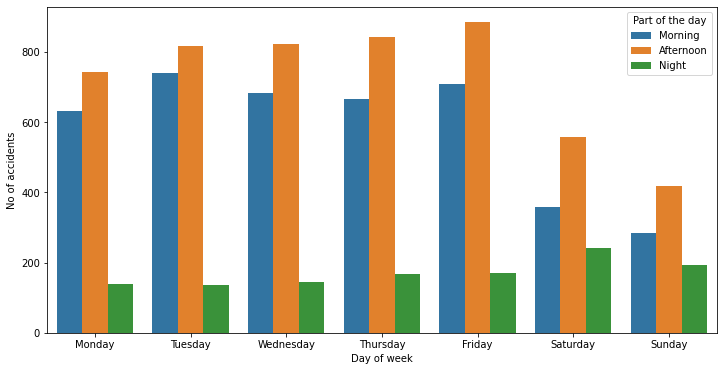

In [ ]:
plt.figure(figsize=(12,6))
sn.countplot(x = 'Weekday', data = df, hue = 'Part of the day', order = day_order)
plt.ylabel('No of accidents')
plt.xlabel('Day of week')
plt.show()

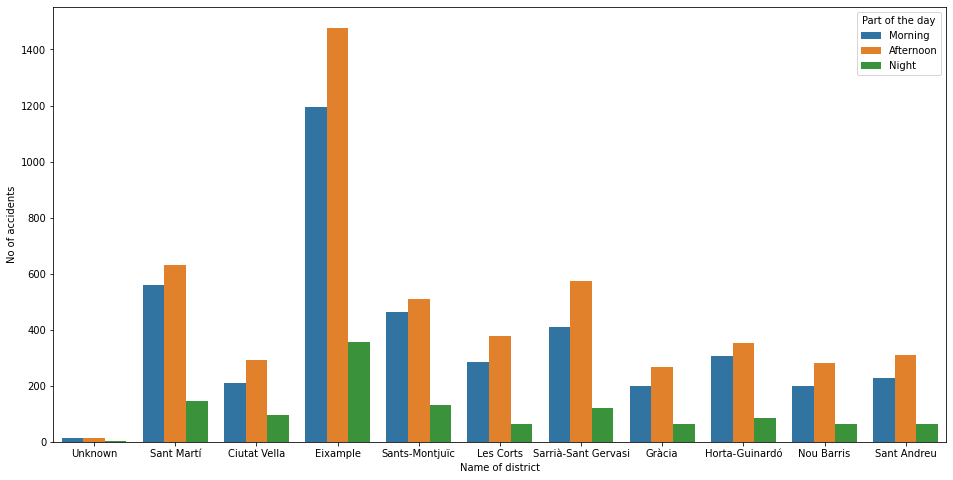

In [ ]:
plt.figure(figsize=(16,8))
sn.countplot(x = 'District Name', data = df, hue = 'Part of the day')
plt.ylabel('No of accidents')
plt.xlabel('Name of district')
plt.show()

So, the pattern of high accidents in afternoon is visible across variables (no special relationships)

### Q6. Any correlation between numerical variables?

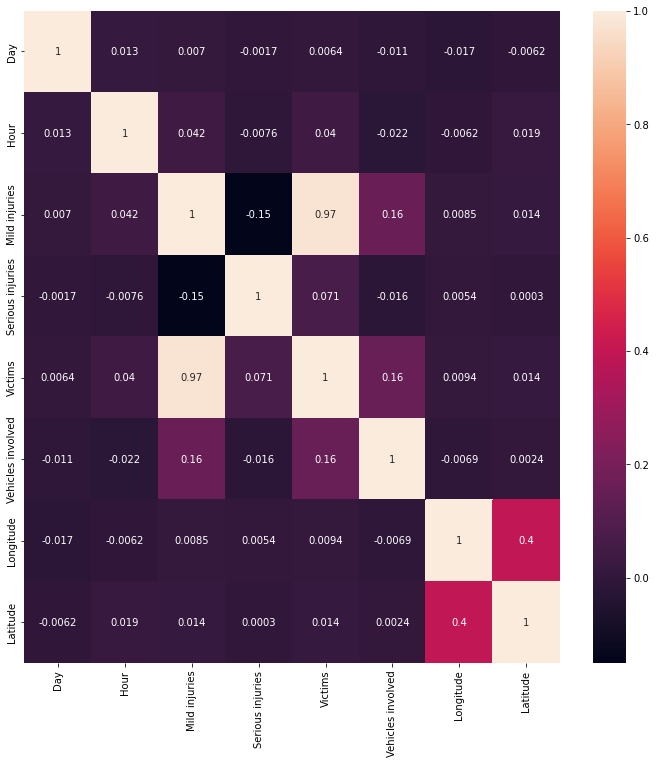

In [ ]:
# Correlation Heatmap
plt, ax = plt.subplots(figsize=(12,12))
cm = df.corr()
ax = sn.heatmap(cm,annot=True)
plt.show()

Strong positive correlation between victims and mild injuries. Here, this implies most of the victims have mild injuries.<br/>
Weak positive correlation between latitude and longitude. This is observed on map as most accidents fall in a inclined rectangular region.